# Photo Restoration using inpainting

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load our damaged photo
image = cv2.imread('images/abraham.jpg')
cv2.imshow('Original Damaged Photo', image)
cv2.waitKey(0)

-1

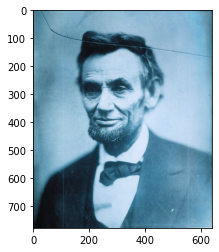

In [4]:
plt.imshow(image)

In [5]:
# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('images/mask.jpg', 0)
cv2.imshow('Marked Damages', marked_damages)
cv2.waitKey(0)

-1

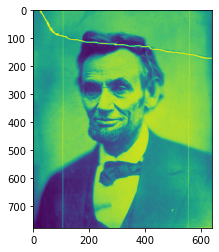

In [6]:
plt.imshow(marked_damages)

In [7]:
# Let's make a mask out of our marked image be changing all colors 
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0)

-1

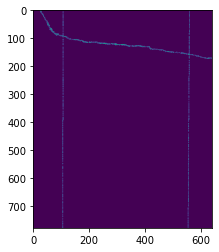

In [8]:
plt.imshow(thresh1)

In [9]:
# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
cv2.imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)
cv2.waitKey(0)
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

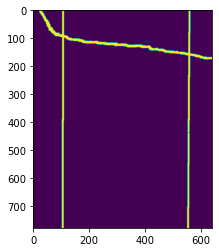

In [10]:
plt.imshow(mask)

In [11]:
cv2.imshow('Restored', restored)
cv2.waitKey(0)
cv2.destroyAllWindows()

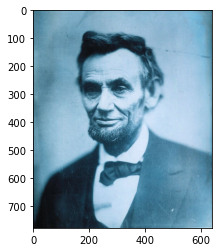

In [12]:
plt.imshow(restored)


Inpainting is the process of reconstructing lost or deteriorated parts of images and videos. It is an advanced form of interpolation that can be used to replace lost or corrupted parts of the image data.

cv2.inpaint(input image, mask, inpaintRadius, Inpaint Method)

inpaintRadius – Radius of a circular neighborhood of each point inpainted that is considered by the algorithm. Smaller values look less blurred, while larger values look more pixelated or blurred.

Inpaint Methods

- INPAINT_NS - Navier-Stokes based method [Navier01]
- INPAINT_TELEA - Method by Alexandru Telea [Telea04] - Better as it integrates more seamlessley into the image.

## Great Work